In [33]:
import json
import networkx as nx

# Load JSON data from file
with open('data.json', 'r') as file:
    data = json.load(file)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph from the JSON data
for item in data:
    G.add_edge(item['From'], item['To'])

In [91]:
sccs_dag = nx.condensation(G)
# list of source nodes in the DAG
sources = [node for node, in_degree in sccs_dag.in_degree() if in_degree == 0]
for source in sources:
    print(sccs_dag.nodes[source]['members'])

{'CNF-SAT'}
{'Partial Match', 'OV'}
{'UOV'}
{'3SUM', "3SUM'", 'All-Integers 3SUM', 'GeomBase'}
{'Combinatorial Triangle Detection', 'Combinatorial BMM', 'CFG Parsing'}
{'Matrix Product'}
{'Negative Triangle Search'}
{'Negative Triangle Listing'}
{'Minimum Witness Finding'}
{'All Pairs Minimum Witness (APMW)'}
{'Minimum Weight Triangle'}
{'Nondecreasing Triangle'}
{'$(\\min, \\leq)$ Product'}
{'Directed Radius'}
{'Undirected Radius'}
{'Directed Median'}
{'Undirected Median'}
{'Triangle Detection'}
{'MAX-CNF-SAT'}
{'OuMv'}
{'Triangle Collection*'}
{'k-Clique'}
{'k-SAT'}
{'Maximum Inner Product Search'}


In [164]:
# list top 20 longest shortest paths in sccs_dag
longest_shortest_paths = []
copy_sccs_dag = sccs_dag.copy()
for i in range(10):
    longest_shortest_path = nx.dag_longest_path(copy_sccs_dag)
    longest_shortest_paths.append(
        longest_shortest_path
    )
    copy_sccs_dag.remove_node(longest_shortest_path[-1])

for path in longest_shortest_paths:
    for node in path:
        print(sccs_dag.nodes[node]['members'], end=' -> ')
    print()

{'k-Clique'} -> {'Max-Weight k-Clique'} -> {'Betweenness Centrality (BC)', 'Maximum Subarray', 'Directed, Weighted APSP', 'Metricity', 'Negative Triangle Detection', 'Undirected, Weighted APSP'} -> {'Replacement Paths Problem (RPP)'} -> {'1-sensitive decremental st-shortest paths'} -> 
{'k-Clique'} -> {'Max-Weight k-Clique'} -> {'Betweenness Centrality (BC)', 'Maximum Subarray', 'Directed, Weighted APSP', 'Metricity', 'Negative Triangle Detection', 'Undirected, Weighted APSP'} -> {'Distance Product'} -> {'Second Shortest Simple Path'} -> 
{'3SUM', "3SUM'", 'All-Integers 3SUM', 'GeomBase'} -> {'Strips Cover Box'} -> {'Triangles Cover Triangle', 'Visible Triangle', 'Hole in Union'} -> {'Triangle Measure'} -> 
{'3SUM', "3SUM'", 'All-Integers 3SUM', 'GeomBase'} -> {'Strips Cover Box'} -> {'Triangles Cover Triangle', 'Visible Triangle', 'Hole in Union'} -> {'3D Motion Planning'} -> 
{'k-Clique'} -> {'Max-Weight k-Clique'} -> {'Betweenness Centrality (BC)', 'Maximum Subarray', 'Directed, Wei

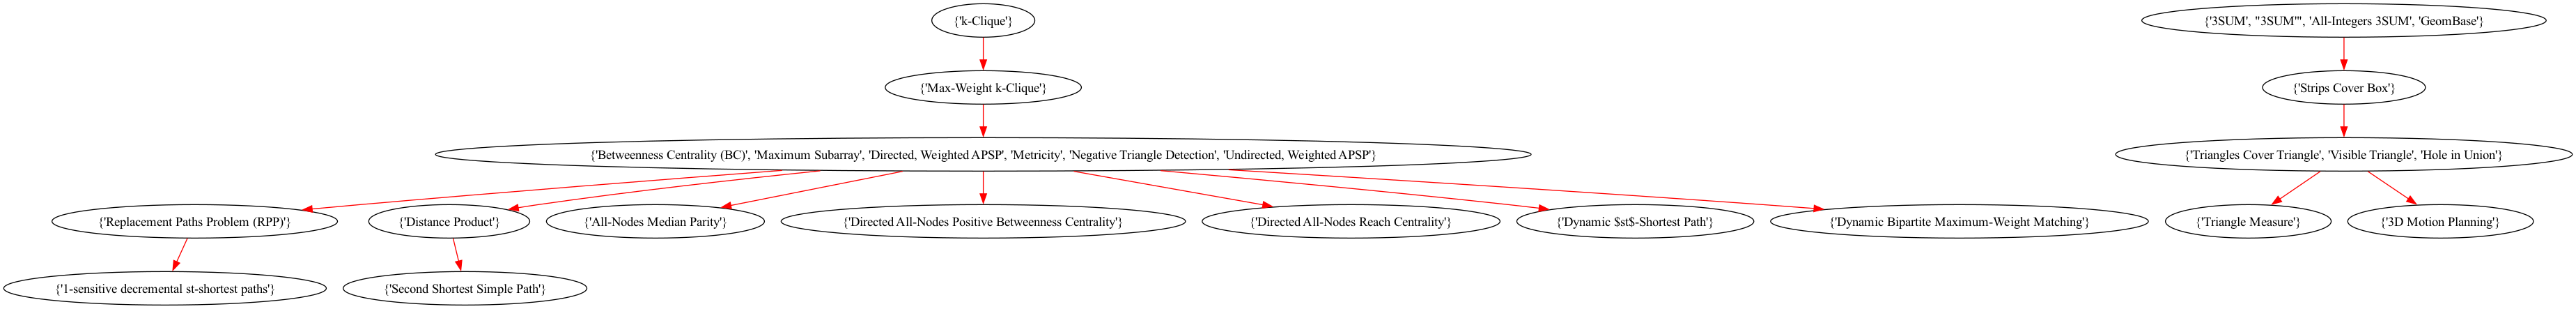

In [169]:
# plot longest shortest paths
import pygraphviz as pgv
import IPython.display as Image

A = pgv.AGraph(strict=True, directed=True)

# highlight longest shortest paths
for path in longest_shortest_paths:
    for i in range(len(path) - 1):
        A.add_edge(
            sccs_dag.nodes[path[i]]['members'],
            sccs_dag.nodes[path[i + 1]]['members'],
            color='red')


A.layout(prog='dot')
filename = "./longest_path_tree.png"
A.draw(filename)

Image.display(Image.Image(filename))



In [118]:
# list top 20 most impactful new edge by largest SCC size
impactful_edges = []

for source in G.nodes:
    for target in G.nodes:
        if source != target:
            copy_G = G.copy()
            copy_G.add_edge(source, target)
            # get the length of the largest SCC
            largest_scc = max(nx.strongly_connected_components(copy_G), key=len)
            impactful_edges.append(
                {
                    'from': source,
                    'to': target,
                    'size': len(largest_scc)
                }
            )

impactful_edges = sorted(impactful_edges, key=lambda x: x['size'], reverse=True)

for i in range(50):
    print(impactful_edges[i])

impactful_edges_by_size = impactful_edges

{'from': 'Reach Centrality', 'to': 'k-Clique', 'size': 12}
{'from': 'Diameter', 'to': 'k-Clique', 'size': 12}
{'from': 'Positive Betweenness Centrality', 'to': 'k-Clique', 'size': 12}
{'from': 'Approximate Betweenness Centrality', 'to': 'k-Clique', 'size': 12}
{'from': 'Reach Centrality', 'to': 'Matrix Product', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Negative Triangle Search', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Negative Triangle Listing', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Minimum Witness Finding', 'size': 11}
{'from': 'Reach Centrality', 'to': 'All Pairs Minimum Witness (APMW)', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Directed Radius', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Undirected Radius', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Directed Median', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Undirected Median', 'size': 11}
{'from': 'Reach Centrality', 'to': 'Max-Weight k-Clique', 'size': 11}
{'from': 'Diameter', 'to': '

In [116]:
# list top 20 most impactful new edge by number of SCCs
impactful_edges = []

for source in G.nodes:
    for target in G.nodes:
        if source != target:
            copy_G = G.copy()
            copy_G.add_edge(source, target)
            # number of SCCs with length > 1
            num_sccs = len([scc for scc in nx.strongly_connected_components(copy_G) if len(scc) > 1])
            impactful_edges.append(
                {
                    'from': source,
                    'to': target,
                    'size': num_sccs
                }
            )

impactful_edges = sorted(impactful_edges, key=lambda x: x['size'], reverse=False)

for i in range(50):
    print(impactful_edges[i])

impactful_edges_by_num_sccs = impactful_edges

{'from': '3 Points on Line', 'to': '3SUM', 'size': 6}
{'from': '3 Points on Line', 'to': "3SUM'", 'size': 6}
{'from': '3 Points on Line', 'to': 'GeomBase', 'size': 6}
{'from': '3 Points on Line', 'to': 'All-Integers 3SUM', 'size': 6}
{'from': 'Point on 3 Lines', 'to': '3SUM', 'size': 6}
{'from': 'Point on 3 Lines', 'to': "3SUM'", 'size': 6}
{'from': 'Point on 3 Lines', 'to': 'GeomBase', 'size': 6}
{'from': 'Point on 3 Lines', 'to': 'All-Integers 3SUM', 'size': 6}
{'from': 'Triangles Cover Triangle', 'to': '3SUM', 'size': 6}
{'from': 'Triangles Cover Triangle', 'to': "3SUM'", 'size': 6}
{'from': 'Triangles Cover Triangle', 'to': 'GeomBase', 'size': 6}
{'from': 'Triangles Cover Triangle', 'to': 'All-Integers 3SUM', 'size': 6}
{'from': 'Hole in Union', 'to': '3SUM', 'size': 6}
{'from': 'Hole in Union', 'to': "3SUM'", 'size': 6}
{'from': 'Hole in Union', 'to': 'GeomBase', 'size': 6}
{'from': 'Hole in Union', 'to': 'All-Integers 3SUM', 'size': 6}
{'from': 'Triangle Measure', 'to': '3SUM', '

In [151]:
ORIGINAL_SCCS = nx.strongly_connected_components(G)
ORIGINAL_SCCS = [scc for scc in ORIGINAL_SCCS if len(scc) > 1]
ORIGINAL_SCCS

# set a color for each scc
colors = {}
for i, scc in enumerate(ORIGINAL_SCCS):
    for node in scc:
        colors[node] = ['#FF9B9B', '#FFD6A5', '#FFFEC4', '#CBFFA9', '#EA8FEA', '#B9F3E4', '#D2E0FB'][i]

colors

{'Diameter': '#FF9B9B',
 'Positive Betweenness Centrality': '#FF9B9B',
 'Approximate Betweenness Centrality': '#FF9B9B',
 'Reach Centrality': '#FF9B9B',
 'Partial Match': '#FFD6A5',
 'OV': '#FFD6A5',
 'Triangles Cover Triangle': '#FFFEC4',
 'Visible Triangle': '#FFFEC4',
 'Hole in Union': '#FFFEC4',
 '3 Points on Line': '#CBFFA9',
 'Point on 3 Lines': '#CBFFA9',
 '3SUM': '#EA8FEA',
 "3SUM'": '#EA8FEA',
 'All-Integers 3SUM': '#EA8FEA',
 'GeomBase': '#EA8FEA',
 'Betweenness Centrality (BC)': '#B9F3E4',
 'Maximum Subarray': '#B9F3E4',
 'Directed, Weighted APSP': '#B9F3E4',
 'Metricity': '#B9F3E4',
 'Negative Triangle Detection': '#B9F3E4',
 'Undirected, Weighted APSP': '#B9F3E4',
 'Combinatorial Triangle Detection': '#D2E0FB',
 'Combinatorial BMM': '#D2E0FB',
 'CFG Parsing': '#D2E0FB'}

In [167]:
import pygraphviz as pgv
import IPython.display as Image


def plot_sccs(G, filename, source, target):
    A = pgv.AGraph(strict=True, directed=True)

    for node in G.nodes:
        if node in colors:
            A.add_node(
                node,
                # background color
                style='filled',
                fillcolor=colors[node]
                
            )
        else:
            A.add_node(
                node
            )

    for edge in G.edges:
        if edge[0] == source and edge[1] == target:
            A.add_edge(
                edge[0],
                edge[1],
                color='red'
            )
        else:
            A.add_edge(
                edge[0],
                edge[1]
            )

    A.layout(prog='dot')
    filename = filename
    A.draw(filename)

    return Image.Image(filename)


def G_with_new_edge(G, source, target, value, folder):
    G_copy = G.copy()
    G_copy.add_edge(source, target)
    # plot only sccs with size > 1 in the same graph
    SCCS = nx.strongly_connected_components(G_copy)
    SCCS = [scc for scc in SCCS if len(scc) > 1]

    G_sccs = nx.DiGraph()

    for scc in SCCS:
        for node in scc:
            G_sccs.add_node(node)

        for node in scc:
            for neighbor in G_copy.neighbors(node):
                if neighbor in scc:
                    G_sccs.add_edge(
                        node,
                        neighbor
                    )

    plot_sccs(G_sccs, folder + '/' +
              str(value) + ' = ' + source + ' -> ' + target + '.png', source, target)

impactful_edges_by_size_filtered = [edge for edge in impactful_edges_by_size if edge['size'] > 6]
impactful_edges_by_num_sccs_filtered = [edge for edge in impactful_edges_by_num_sccs if edge['size'] < 7]


for i in range(len(impactful_edges_by_size_filtered)):
    G_with_new_edge(G, impactful_edges_by_size[i]['from'], impactful_edges_by_size[i]
                    ['to'], impactful_edges_by_size[i]['size'], 'impactful_edges_by_size')

for i in range(len(impactful_edges_by_num_sccs_filtered)):
    G_with_new_edge(G, impactful_edges_by_num_sccs[i]['from'], impactful_edges_by_num_sccs[i]
                    ['to'], impactful_edges_by_num_sccs[i]['size'], 'impactful_edges_by_num_sccs')
    


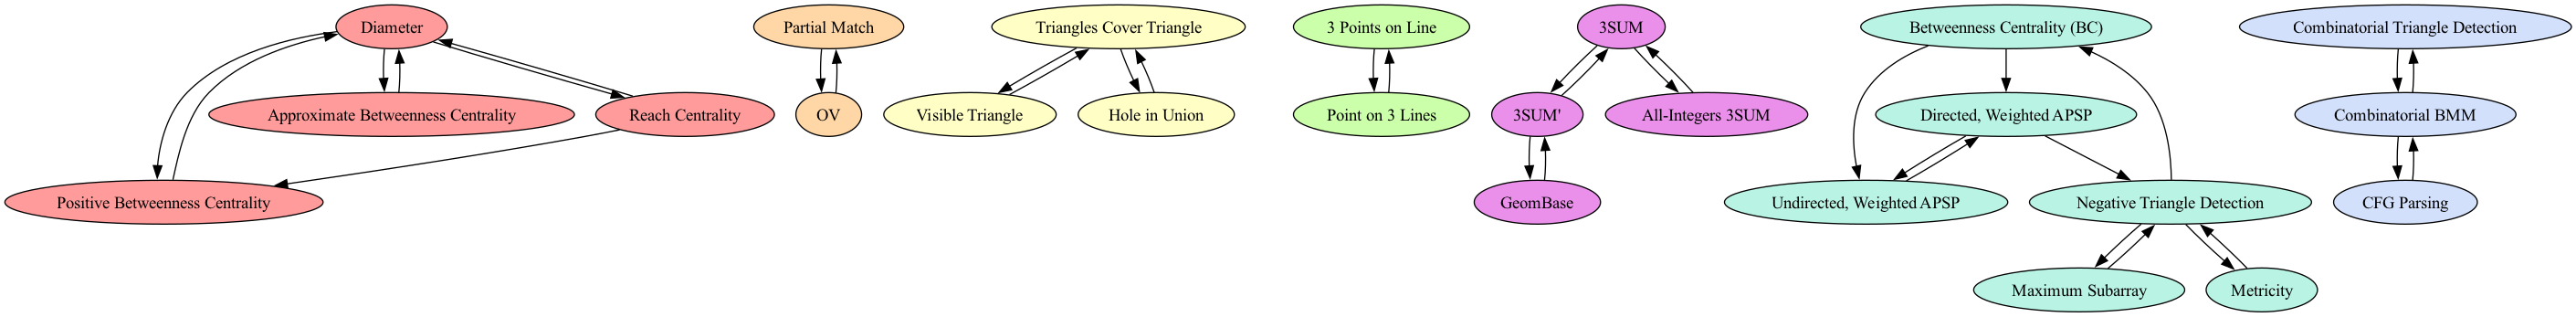

In [160]:
SCCS = nx.strongly_connected_components(G)
SCCS = [scc for scc in SCCS if len(scc) > 1]

G_sccs = nx.DiGraph()

for scc in SCCS:
    for node in scc:
        G_sccs.add_node(node)

    for node in scc:
        for neighbor in G.neighbors(node):
            if neighbor in scc:
                G_sccs.add_edge(
                    node,
                    neighbor
                )

plot_sccs(G_sccs, 'original_sccs.png', None, None)

In [179]:
# generate a markdown table for the top 20 most impactful new edges by largest SCC size
print('| Size of the Largest SCC | From | To | Graph |')
print('| --- | --- | --- | --- |')
for i in impactful_edges_by_size_filtered:
    print(f'| {i["size"]} | {i["from"]} | {i["to"]} | ![alt text](<impactful_edges_by_size/{i["size"]} = {i["from"]} -\> {i["to"]}.png>) |')


| Size of the Largest SCC | From | To | Graph |
| --- | --- | --- | --- |
| 12 | Reach Centrality | k-Clique | ![alt text](<impactful_edges_by_size/12 = Reach Centrality -\> k-Clique.png>) |
| 12 | Diameter | k-Clique | ![alt text](<impactful_edges_by_size/12 = Diameter -\> k-Clique.png>) |
| 12 | Positive Betweenness Centrality | k-Clique | ![alt text](<impactful_edges_by_size/12 = Positive Betweenness Centrality -\> k-Clique.png>) |
| 12 | Approximate Betweenness Centrality | k-Clique | ![alt text](<impactful_edges_by_size/12 = Approximate Betweenness Centrality -\> k-Clique.png>) |
| 11 | Reach Centrality | Matrix Product | ![alt text](<impactful_edges_by_size/11 = Reach Centrality -\> Matrix Product.png>) |
| 11 | Reach Centrality | Negative Triangle Search | ![alt text](<impactful_edges_by_size/11 = Reach Centrality -\> Negative Triangle Search.png>) |
| 11 | Reach Centrality | Negative Triangle Listing | ![alt text](<impactful_edges_by_size/11 = Reach Centrality -\> Negative Tria

<>:5: SyntaxWarning: invalid escape sequence '\>'
<>:5: SyntaxWarning: invalid escape sequence '\>'
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3140/1608622247.py:5: SyntaxWarning: invalid escape sequence '\>'
  print(f'| {i["size"]} | {i["from"]} | {i["to"]} | ![alt text](<impactful_edges_by_size/{i["size"]} = {i["from"]} -\> {i["to"]}.png>) |')


In [178]:
# generate a markdown table for the top 20 most impactful new edges by number of SCCs
print('| Number of SCCs | From | To | Graph |')
print('| --- | --- | --- | --- |')
for i in impactful_edges_by_num_sccs_filtered:
    print(f'| {i["size"]} | {i["from"]} | {i["to"]} | ![alt text](<impactful_edges_by_size/{i["size"]} = {i["from"]} -\> {i["to"]}.png>) |')
    

| Number of SCCs | From | To | Graph |
| --- | --- | --- | --- |
| 6 | 3 Points on Line | 3SUM | ![alt text](<impactful_edges_by_size/6 = 3 Points on Line -\> 3SUM.png>) |
| 6 | 3 Points on Line | 3SUM' | ![alt text](<impactful_edges_by_size/6 = 3 Points on Line -\> 3SUM'.png>) |
| 6 | 3 Points on Line | GeomBase | ![alt text](<impactful_edges_by_size/6 = 3 Points on Line -\> GeomBase.png>) |
| 6 | 3 Points on Line | All-Integers 3SUM | ![alt text](<impactful_edges_by_size/6 = 3 Points on Line -\> All-Integers 3SUM.png>) |
| 6 | Point on 3 Lines | 3SUM | ![alt text](<impactful_edges_by_size/6 = Point on 3 Lines -\> 3SUM.png>) |
| 6 | Point on 3 Lines | 3SUM' | ![alt text](<impactful_edges_by_size/6 = Point on 3 Lines -\> 3SUM'.png>) |
| 6 | Point on 3 Lines | GeomBase | ![alt text](<impactful_edges_by_size/6 = Point on 3 Lines -\> GeomBase.png>) |
| 6 | Point on 3 Lines | All-Integers 3SUM | ![alt text](<impactful_edges_by_size/6 = Point on 3 Lines -\> All-Integers 3SUM.png>) |
| 6 | T

<>:5: SyntaxWarning: invalid escape sequence '\>'
<>:5: SyntaxWarning: invalid escape sequence '\>'
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3140/38894822.py:5: SyntaxWarning: invalid escape sequence '\>'
  print(f'| {i["size"]} | {i["from"]} | {i["to"]} | ![alt text](<impactful_edges_by_size/{i["size"]} = {i["from"]} -\> {i["to"]}.png>) |')
